# Project Proposal

TO BE UPDATED LATER

# Project Code

In [14]:
#Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import & Cleaning

In [15]:
#Find Current Path & List of Files/Folders in Current Path
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through List of Files/Folders in Current Path
for item in current_directory:
    
    #Set Condtion for Folder Containing Airbnb Data
    if item.lower().find('airbnb') >= 0 and item.lower().find('ipynb') == -1:

        #Loop Through List of Files/Folders in Airbnb Data Folder
        for data in os.listdir(os.path.join(current_path, item)):
            
            #Set Condition for AirBnb Data CSV File
            if data.lower().find('nyc') >= 0 and data.lower().find('csv') >= 0:

                #Define Path Variable for Airbnb Data CSV File
                input_file = os.path.join(current_path, item, data)
        
    #Set Condition for Folder for Output Result Plot Images
    elif item.lower().find('images') >= 0:
            
        #Define Path Variable for Output Results Folder
        output_path = os.path.join(current_path, item)

In [16]:
#Import Raw Data from CSV File
raw_data = pd.read_csv(input_file)
raw_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [17]:
#Clean Raw Data by Dropping Rows with Missing Information
cleaned_data = raw_data.dropna().reset_index(drop = True)

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [18]:
#Clean Raw Data by Dropping Rows with Incorrect Information
cleaned_data = cleaned_data[cleaned_data['latitude'] >= -90]
cleaned_data = cleaned_data[cleaned_data['latitude'] <= 90]
cleaned_data = cleaned_data[cleaned_data['longitude'] >= -180]
cleaned_data = cleaned_data[cleaned_data['longitude'] <= 180]
cleaned_data = cleaned_data[cleaned_data['price'] > 0]
cleaned_data = cleaned_data[cleaned_data['availability_365'] <= 365]

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


## Data Processing & Analysis

### NYC Complete Data

In [19]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)
#


#How many properties of each type are listed?
room_type_data = {
    "Room Type":['Entire home/apt', 'Private Room', 'Shared Room'],
    "Count":[20320, 17647, 844]}
room_type_data_DF = pd.DataFrame(room_type_data)
room_type_data_DF


,Room Type,Count
0,Entire home/apt,20320
1,Private Room,17647
2,Shared Room,844


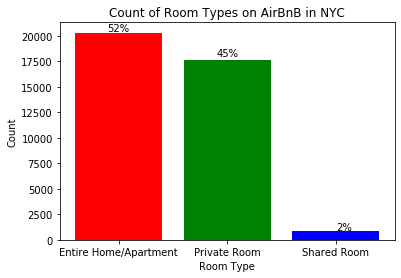

In [39]:
plt.bar(np.arange(0,3),room_type_data_DF['Count'], color=['red', 'green', 'blue'])
plt.title("Count of Room Types on AirBnB in NYC")
x_axis = np.arange(len(room_type_data_DF))
ticks = [value for value in x_axis]
plt.xticks(ticks, ["Entire Home/Apartment", "Private Room", "Shared Room"])
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.annotate("52%", xy=(-.1,20450))
plt.annotate("45%", xy=(.9, 18000))
plt.annotate("2%", xy=(2, 900))
plt.show()

In [21]:
#dataframe
#How many unique hosts are present for each type of property?
host_id_data = cleaned_data.groupby('room_type').host_id.nunique()
host_id_df = pd.DataFrame(host_id_data)
host_id_df

,host_id
room_type,
Entire home/apt,17720
Private room,13122
Shared room,554


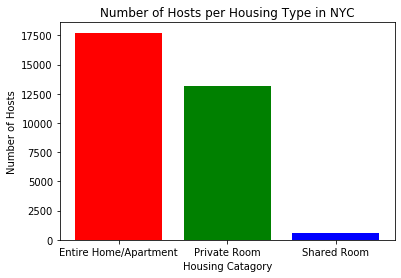

In [9]:
plt.bar(np.arange(0,3),host_id_df['host_id'], color=['red', 'green', 'blue'])
plt.title("Number of Hosts per Housing Type in NYC")
x_axis = np.arange(len(room_type_data_DF))
ticks = [value for value in x_axis]
plt.xticks(ticks, ["Entire Home/Apartment", "Private Room", "Shared Room"])
plt.xlabel("Housing Catagory")
plt.ylabel("Number of Hosts")
plt.show()

### NYC Borough Data

In [10]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)
#
#How many properties of each type are listed within each borough?
#Is there a correlation between property price and minimum number of nights within each borough?
#What is the percentage of property types available within each borough?
#What is the average number of days available for each type of property in each borough?


In [11]:
#What is the average price for each type of property in each borough?
avgprice_1 = cleaned_data[["neighbourhood_group", "room_type", "price"]]
avgprice_2 = avgprice_1.groupby(['neighbourhood_group', 'room_type'])
avgprice_3 = avgprice_2.mean()
avgprice_3.round()

price
neighbourhood_group room_type             
Bronx               Entire home/apt  121.0
                    Private room      57.0
                    Shared room       57.0
Brooklyn            Entire home/apt  171.0
                    Private room      73.0
                    Shared room       46.0
Manhattan           Entire home/apt  230.0
                    Private room     107.0
                    Shared room       78.0
Queens              Entire home/apt  139.0
                    Private room      69.0
                    Shared room       64.0
Staten Island       Entire home/apt  125.0
                    Private room      58.0
                    Shared room       58.0

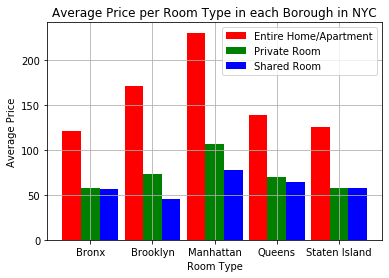

In [53]:
avgprice_entire = [avgprice_3['price'][0], avgprice_3['price'][3],
                    avgprice_3['price'][6], avgprice_3['price'][9],
                    avgprice_3['price'][12]]
avgprice_private = [avgprice_3['price'][1], avgprice_3['price'][4],
                    avgprice_3['price'][7],avgprice_3['price'][10],
                    avgprice_3['price'][13]]
avgprice_shared = [avgprice_3['price'][2], avgprice_3['price'][5],
                    avgprice_3['price'][8], avgprice_3['price'][11],
                    avgprice_3['price'][14]]
Legend = ["Entire Home/Apartment", "Private Room", "Shared Room"]
plt.bar(np.arange(1, 6) - 0.3, avgprice_entire, width = 0.3, color='red')
plt.bar(np.arange(1, 6), avgprice_private, width = 0.3, color='Green')
plt.bar(np.arange(1, 6) + 0.3, avgprice_shared, width = 0.3, color='blue')
plt.title("Average Price per Room Type in each Borough in NYC")
plt.ylabel("Average Price")
plt.xlabel("Room Type")
ticks = [1, 2, 3, 4, 5]
plt.xticks(ticks, ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.legend(Legend)
plt.grid()

### NYC Neighborhood Data

In [13]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)

#What is the average number of minimum nights for each type of property in each borough?
#In each borough, what are the 5 neighborhoods with the most reviews?
#In each borough, what are the 5 neighborhoods with the highest percentage each property type?
#In each borough, what are the 5 neighborhoods with the highest average price for each property type?
#In each borough, what are the 5 neighborhoods with the lowest average price for each property type?
#In each borough, what are the 5 neighborhoods with the lowest average number of minimum nights?

# Project Observations & Conclusions

TO BE UPDATED LATER